This is a dataset that describes sonar chirp returns bouncing off different services. The 60 input variables are the strength of the returns at different angles. It is a **binary classification problem** that requires a model to differentiate rocks from metal cylinders.


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("sonar.csv", header=None, skiprows = 1)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
86,0.0188,0.0370,0.0953,0.0824,0.0249,0.0488,0.1424,0.1972,0.1873,0.1806,...,0.0093,0.0033,0.0113,0.0030,0.0057,0.0090,0.0057,0.0068,0.0024,Rock
36,0.0094,0.0166,0.0398,0.0359,0.0681,0.0706,0.1020,0.0893,0.0381,0.1328,...,0.0141,0.0191,0.0145,0.0065,0.0129,0.0217,0.0087,0.0077,0.0122,Rock
168,0.0015,0.0186,0.0289,0.0195,0.0515,0.0817,0.1005,0.0124,0.1168,0.1476,...,0.0108,0.0075,0.0089,0.0036,0.0029,0.0013,0.0010,0.0032,0.0047,Mine
22,0.0099,0.0484,0.0299,0.0297,0.0652,0.1077,0.2363,0.2385,0.0075,0.1882,...,0.0173,0.0149,0.0115,0.0202,0.0139,0.0029,0.0160,0.0106,0.0134,Rock
7,0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,Rock


In [3]:
X = df.drop(60, axis=1)
y = df[60]
y.head()

0    Rock
1    Rock
2    Rock
3    Rock
4    Rock
Name: 60, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()


y = encoder.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

_, x_val,_, y_val = train_test_split(X_test,y_test, test_size=0.25, random_state=1)

# Using Deep Learning Model

## Building Our NN Model

In [6]:
import tensorflow as tf
from tensorflow import keras

In [7]:
model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)



Epoch 1/100


14/14 [==============================] - 2s 21ms/step - loss: 0.6868 - accuracy: 0.6239 - val_loss: 0.6657 - val_accuracy: 0.6596
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.5688 - val_loss: 0.6519 - val_accuracy: 0.5532
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.6603 - accuracy: 0.6606 - val_loss: 0.6357 - val_accuracy: 0.7234
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.6606 - val_loss: 0.6171 - val_accuracy: 0.7234
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6196 - accuracy: 0.6697 - val_loss: 0.6003 - val_accuracy: 0.7660
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6038 - accuracy: 0.7523 - val_loss: 0.5774 - val_accuracy: 0.7872
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5779 - accuracy: 0.7982 - val_loss: 0.5476 - val_accuracy: 0.7872
Epoch 8/

In [8]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 8ms/step - loss: 1.2394 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


In [9]:
loss, acc = model.evaluate(X_train, y_train)
print('Training Accuracy: ', acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.3268 - accuracy: 0.9615
Training Accuracy:  96.15384340286255


Our model is overfitting

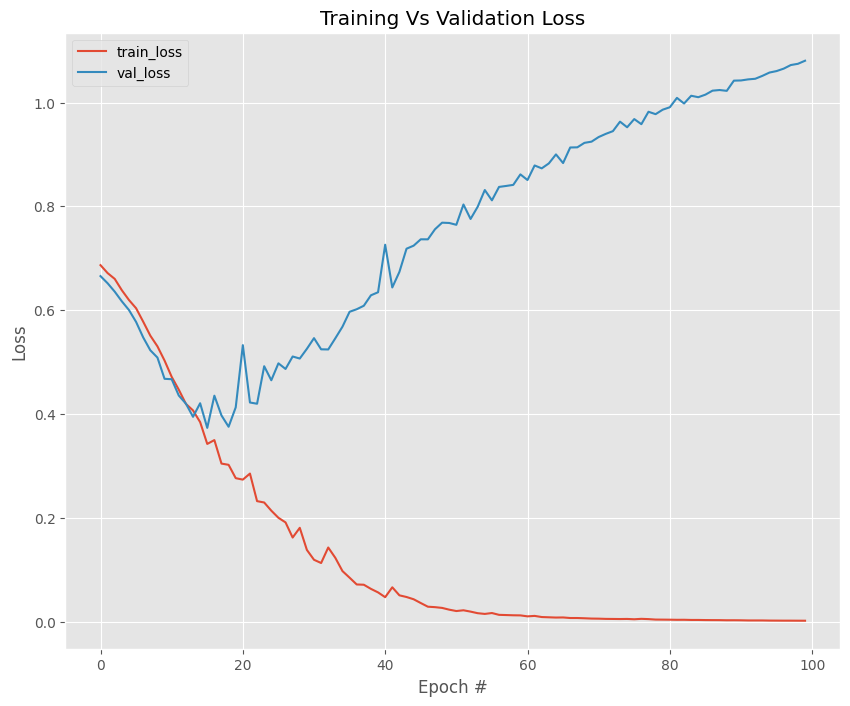

In [10]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Fixing Overfitting





# Adding L2 Regularization from Keras

In [39]:
#kernel_regularizer=tf.keras.regularizers.l2(0.1)



model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.2)),
    keras.layers.Dense(30, activation='relu'),

    keras.layers.Dense(15, activation='relu'),

    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 18ms/step - loss: 13.1130 - accuracy: 0.5138 - val_loss: 11.7315 - val_accuracy: 0.5532
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 10.7352 - accuracy: 0.5505 - val_loss: 9.5789 - val_accuracy: 0.5532
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 8.7512 - accuracy: 0.5596 - val_loss: 7.8000 - val_accuracy: 0.5957
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 7.1235 - accuracy: 0.5688 - val_loss: 6.3458 - val_accuracy: 0.5745
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 5.7983 - accuracy: 0.5596 - val_loss: 5.1669 - val_accuracy: 0.6170
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 4.7271 - accuracy: 0.5872 - val_loss: 4.2117 - val_accuracy: 0.6170
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 3.8620 - accuracy: 0.6055 - val_loss: 3.4471 - val_accuracy: 0.6596
Epoch 8/1

In [40]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.7500
Test Accuracy:  75.0


In [41]:
loss, acc = model.evaluate(X_train, y_train)
print('Train Accuracy: ', acc*100)

5/5 [==============================] - 0s 2ms/step - loss: 0.3799 - accuracy: 0.9167
Train Accuracy:  91.66666865348816


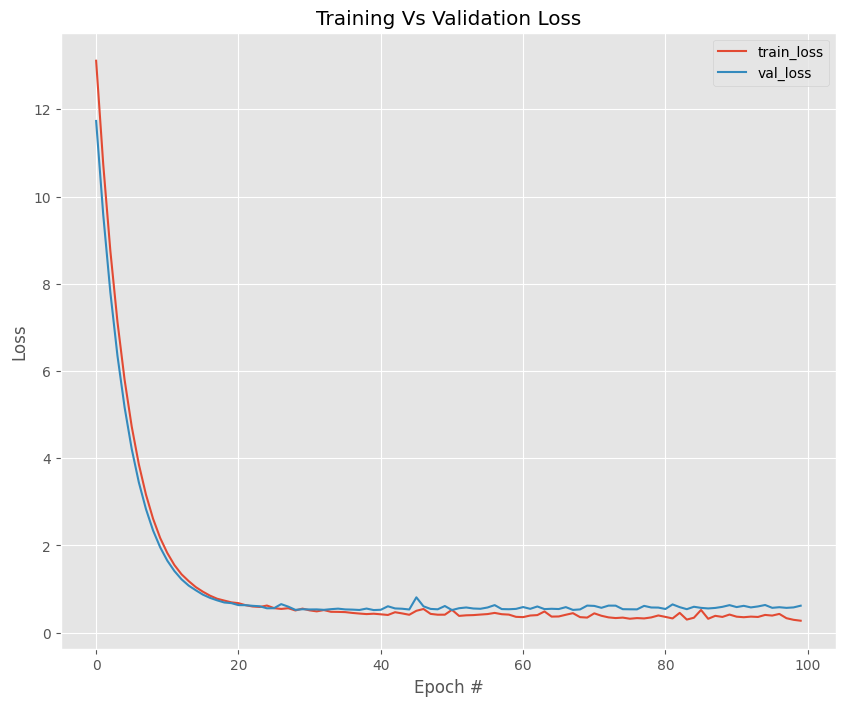

In [42]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

## Model with Dropout Layer 

# Adding dropout and regularization

In [43]:

model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.2)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(30, activation='relu'),

    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3)

Epoch 1/100
14/14 [==============================] - 1s 17ms/step - loss: 12.8698 - accuracy: 0.5688 - val_loss: 11.4968 - val_accuracy: 0.7021
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 10.5140 - accuracy: 0.5780 - val_loss: 9.3652 - val_accuracy: 0.6809
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 8.5480 - accuracy: 0.6055 - val_loss: 7.6081 - val_accuracy: 0.6170
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 6.9468 - accuracy: 0.5872 - val_loss: 6.1750 - val_accuracy: 0.6809
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 5.6398 - accuracy: 0.6606 - val_loss: 5.0196 - val_accuracy: 0.6596
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 4.5986 - accuracy: 0.6055 - val_loss: 4.0844 - val_accuracy: 0.6383
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 3.7362 - accuracy: 0.6697 - val_loss: 3.3376 - val_accuracy: 0.7021
Epoch 8/1

In [44]:
loss, acc = model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 4ms/step - loss: 0.6096 - accuracy: 0.7692
Test Accuracy:  76.92307829856873


In [45]:
loss, acc = model.evaluate(X_train, y_train)
print('Train Accuracy: ', acc*100)

5/5 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.9231
Train Accuracy:  92.30769276618958


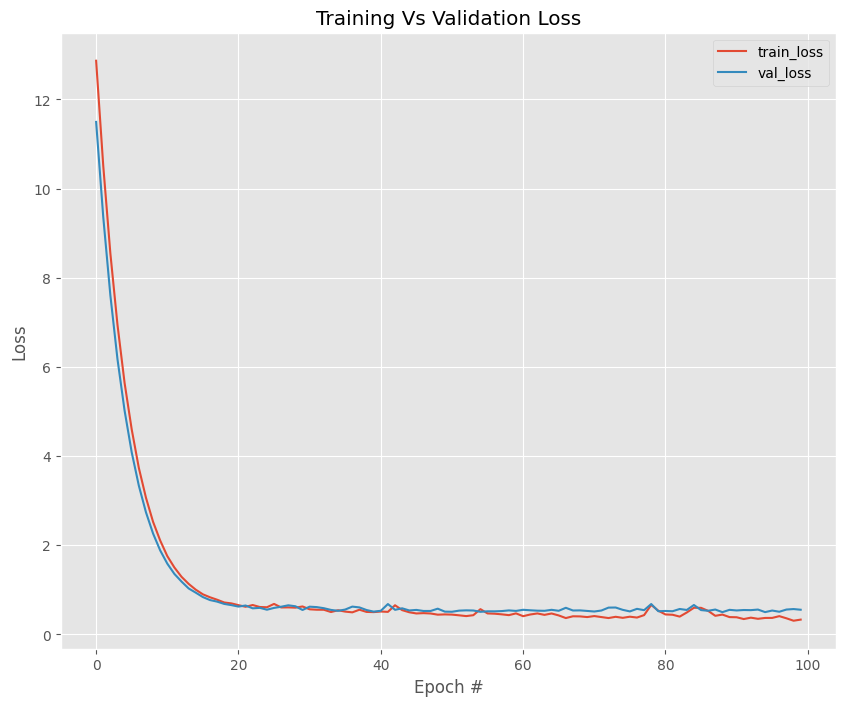

In [46]:
import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")


# plot training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# Early Stopping

In [48]:




model = keras.Sequential([
    keras.layers.Dense(80, input_dim=60, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.2)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(30, activation='relu'),

    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3,callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',verbose=1, patience=5)
)


Epoch 1/100
14/14 [==============================] - 1s 20ms/step - loss: 13.2667 - accuracy: 0.5688 - val_loss: 11.8921 - val_accuracy: 0.5319
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 10.8799 - accuracy: 0.5413 - val_loss: 9.7158 - val_accuracy: 0.5319
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 8.8674 - accuracy: 0.5505 - val_loss: 7.9120 - val_accuracy: 0.5319
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 7.2231 - accuracy: 0.5505 - val_loss: 6.4378 - val_accuracy: 0.5319
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 5.8825 - accuracy: 0.5872 - val_loss: 5.2403 - val_accuracy: 0.6383
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 4.7927 - accuracy: 0.6239 - val_loss: 4.2769 - val_accuracy: 0.5532
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 3.9141 - accuracy: 0.5963 - val_loss: 3.4978 - val_accuracy: 0.6809
Epoch 8/1

In [49]:

loss, acc=model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 5ms/step - loss: 0.6462 - accuracy: 0.7115
Test Accuracy:  71.15384340286255


In [50]:

loss, acc = model.evaluate(X_train, y_train)
print('Training Accuracy: ', acc*100)

5/5 [==============================] - 0s 2ms/step - loss: 0.6185 - accuracy: 0.7244
Training Accuracy:  72.43589758872986


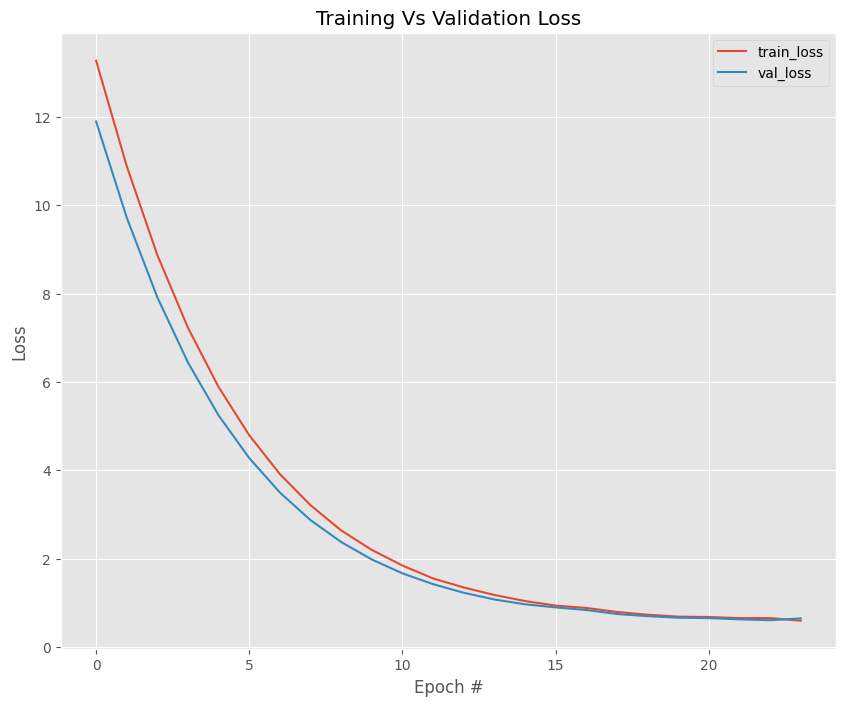

In [51]:

import matplotlib.pyplot as plt


epochs = np.arange(0, len(H.history["loss"]))
plt.figure(figsize=(10,8))
plt.style.use("ggplot")
# (fig, axs) = plt.subplots(2, 1)
# plot the *unshifted* training and validation loss
plt.style.use("ggplot")
plt.plot(epochs, H.history["loss"], label="train_loss")
plt.plot(epochs, H.history["val_loss"], label="val_loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

# model Checkpoint

In [52]:

from tensorflow.keras.callbacks import ModelCheckpoint

model = keras.Sequential([
keras.layers.Dense(80, input_dim=60, activation='relu'),
keras.layers.Dense(30, activation='relu'),
keras.layers.Dense(15, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint = ModelCheckpoint('SOMETHINGELSE', monitor="val_loss", mode="min",
	save_best_only=True, verbose=1),
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',verbose=1, patience=5)
callbacks = [checkpoint,earlystopping]


H = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.3,callbacks=callbacks) 


Epoch 1/100
 1/14 [=>............................] - ETA: 12s - loss: 0.6702 - accuracy: 0.6250
Epoch 1: val_loss improved from inf to 0.69019, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 2s 61ms/step - loss: 0.7185 - accuracy: 0.4587 - val_loss: 0.6902 - val_accuracy: 0.5532
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6715 - accuracy: 0.7500
Epoch 2: val_loss improved from 0.69019 to 0.68034, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 71ms/step - loss: 0.6807 - accuracy: 0.6881 - val_loss: 0.6803 - val_accuracy: 0.6383
Epoch 3/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6856 - accuracy: 0.5000
Epoch 3: val_loss improved from 0.68034 to 0.66494, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 62ms/step - loss: 0.6722 - accuracy: 0.5963 - val_loss: 0.6649 - val_accuracy: 0.6809
Epoch 4/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6320 - accuracy: 0.8750
Epoch 4: val_loss improved from 0.66494 to 0.64198, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 53ms/step - loss: 0.6539 - accuracy: 0.7339 - val_loss: 0.6420 - val_accuracy: 0.8511
Epoch 5/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6131 - accuracy: 1.0000
Epoch 5: val_loss improved from 0.64198 to 0.61385, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 52ms/step - loss: 0.6343 - accuracy: 0.7890 - val_loss: 0.6138 - val_accuracy: 0.8085
Epoch 6/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6023 - accuracy: 0.8750
Epoch 6: val_loss improved from 0.61385 to 0.57489, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 59ms/step - loss: 0.6227 - accuracy: 0.7156 - val_loss: 0.5749 - val_accuracy: 0.7872
Epoch 7/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5205 - accuracy: 1.0000
Epoch 7: val_loss improved from 0.57489 to 0.55989, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 53ms/step - loss: 0.5785 - accuracy: 0.7706 - val_loss: 0.5599 - val_accuracy: 0.7021
Epoch 8/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6060 - accuracy: 0.6250
Epoch 8: val_loss improved from 0.55989 to 0.50457, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 52ms/step - loss: 0.5479 - accuracy: 0.7706 - val_loss: 0.5046 - val_accuracy: 0.8298
Epoch 9/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5604 - accuracy: 0.7500
Epoch 9: val_loss improved from 0.50457 to 0.47185, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 81ms/step - loss: 0.5148 - accuracy: 0.7431 - val_loss: 0.4719 - val_accuracy: 0.8298
Epoch 10/100
 1/14 [=>............................] - ETA: 0s - loss: 0.6140 - accuracy: 0.7500
Epoch 10: val_loss improved from 0.47185 to 0.44996, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 56ms/step - loss: 0.4842 - accuracy: 0.7890 - val_loss: 0.4500 - val_accuracy: 0.8298
Epoch 11/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5553 - accuracy: 0.7500
Epoch 11: val_loss improved from 0.44996 to 0.43498, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 63ms/step - loss: 0.4452 - accuracy: 0.8716 - val_loss: 0.4350 - val_accuracy: 0.8298
Epoch 12/100
 1/14 [=>............................] - ETA: 0s - loss: 0.3388 - accuracy: 0.8750
Epoch 12: val_loss did not improve from 0.43498
14/14 [==============================] - 0s 6ms/step - loss: 0.4060 - accuracy: 0.8716 - val_loss: 0.4402 - val_accuracy: 0.8085
Epoch 13/100
 1/14 [=>............................] - ETA: 0s - loss: 0.5215 - accuracy: 0.6250
Epoch 13: val_loss improved from 0.43498 to 0.41320, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 54ms/step - loss: 0.3864 - accuracy: 0.8532 - val_loss: 0.4132 - val_accuracy: 0.8298
Epoch 14/100
 1/14 [=>............................] - ETA: 0s - loss: 0.3873 - accuracy: 0.8750
Epoch 14: val_loss improved from 0.41320 to 0.40426, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 53ms/step - loss: 0.3620 - accuracy: 0.8440 - val_loss: 0.4043 - val_accuracy: 0.8085
Epoch 15/100
 1/14 [=>............................] - ETA: 0s - loss: 0.3861 - accuracy: 0.6250
Epoch 15: val_loss improved from 0.40426 to 0.38844, saving model to SOMETHINGELSE
INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


INFO:tensorflow:Assets written to: SOMETHINGELSE\assets


14/14 [==============================] - 1s 56ms/step - loss: 0.4028 - accuracy: 0.8257 - val_loss: 0.3884 - val_accuracy: 0.8298
Epoch 16/100
 1/14 [=>............................] - ETA: 0s - loss: 0.3447 - accuracy: 0.8750
Epoch 16: val_loss did not improve from 0.38844
14/14 [==============================] - 0s 5ms/step - loss: 0.3614 - accuracy: 0.8073 - val_loss: 0.4608 - val_accuracy: 0.7872
Epoch 17/100
 1/14 [=>............................] - ETA: 0s - loss: 0.4598 - accuracy: 0.7500
Epoch 17: val_loss did not improve from 0.38844
14/14 [==============================] - 0s 5ms/step - loss: 0.3249 - accuracy: 0.8991 - val_loss: 0.3941 - val_accuracy: 0.8085
Epoch 18/100
 1/14 [=>............................] - ETA: 0s - loss: 0.2219 - accuracy: 1.0000
Epoch 18: val_loss did not improve from 0.38844
14/14 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.8807 - val_loss: 0.5432 - val_accuracy: 0.7234
Epoch 19/100
 1/14 [=>............................]

In [53]:

loss, acc=model.evaluate(X_test, y_test)
print('Test Accuracy: ', acc*100)

2/2 [==============================] - 0s 4ms/step - loss: 0.4692 - accuracy: 0.7308
Test Accuracy:  73.07692170143127


#Load best weight

In [54]:
model = keras.Sequential([
keras.layers.Dense(80, input_dim=60, activation='relu'),
keras.layers.Dense(30, activation='relu'),
keras.layers.Dense(15, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])





model.load_weights("SOMETHINGELSE")
print(model.evaluate(X_test, y_test))



2/2 [==============================] - 0s 4ms/step - loss: 0.4684 - accuracy: 0.7308
[0.4684184193611145, 0.7307692170143127]
